# Name :  Deeksha Singh
## The Spark Foundation
### Task-02 : IRIS_Prediction using Unsupervised ML

##### Task Satement
- From the given dataset 'IRIS', predict the optimum number of clusters and represent it visually.

#### Importing warings and Libraries package

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Libraries package
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans

# Importing libraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


### Read the Data

In [3]:
# Read the given CSV file, and view some sample records

df = pd.read_csv(r"D:\Downloads\deeksha0117\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Understanding

In [4]:
print(df.describe())
print(df.shape)
print(df.info())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non

In [5]:
# Code for column-wise null count here
df.isnull().sum(axis=0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Write your code for row-wise null count here
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

In [7]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 3)

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

- By checking the null values for columns , rows and there percentage, we came to know that there are no null values. 

##### Checking total no.in each variety

In [8]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

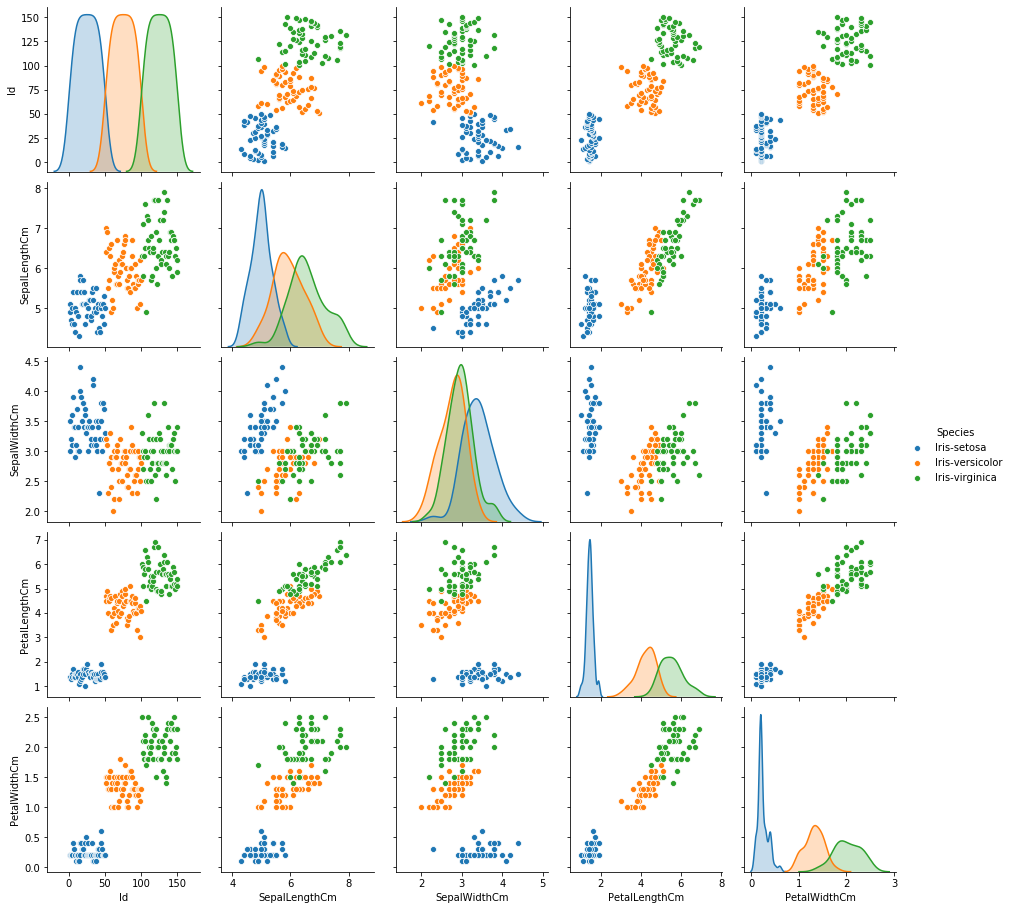

In [9]:
sns.pairplot(df,hue='Species')
plt.show()

- Blue cluster shows Iris-setosa, Orange cluster shows Iris-versicolor, Green cluster shows Iris-Virginica
- All three varieties (Iris-virginica, Iris-versicolor, Iris-setosa ) have equal number of flowers
- Pairplot shows clearly three clusters
- Iris-virginica has maximum Sepal & Petal length-width

In [10]:
# Id is also dropped as it is creating confusion with the S.No.

df.drop('Id', axis =1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Adding a new column 'ID' as it will assign a unique ID to each row

df['ID'] = df.index+100
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,ID
0,5.1,3.5,1.4,0.2,Iris-setosa,100
1,4.9,3.0,1.4,0.2,Iris-setosa,101
2,4.7,3.2,1.3,0.2,Iris-setosa,102
3,4.6,3.1,1.5,0.2,Iris-setosa,103
4,5.0,3.6,1.4,0.2,Iris-setosa,104


In [12]:
# Assigning each all 4 categories with numerical variable

feature = df.columns[:]
for i in enumerate(feature):
    print(i)

(0, 'SepalLengthCm')
(1, 'SepalWidthCm')
(2, 'PetalLengthCm')
(3, 'PetalWidthCm')
(4, 'Species')
(5, 'ID')


### EDA

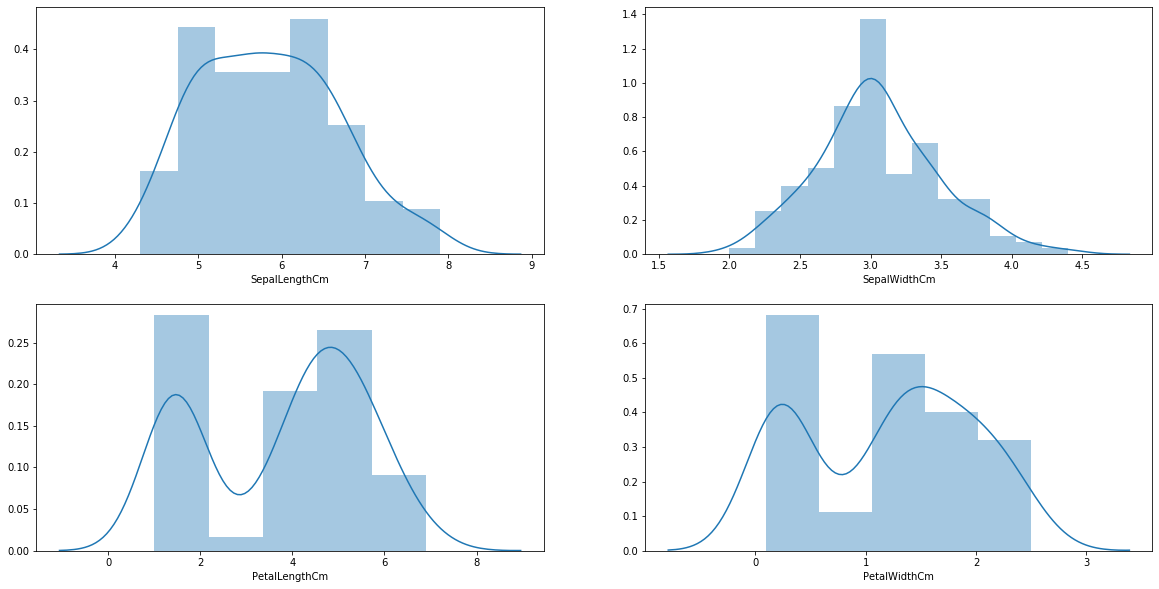

In [13]:
plt.figure(figsize = (20,10))
feature = df.columns[:4]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(df[i[1]])

- SepalLengthCm & SepalWidthCm are showing Normal Distribution while PetalLengthCm & PetalWidthCm don't

### Checking Outlier 

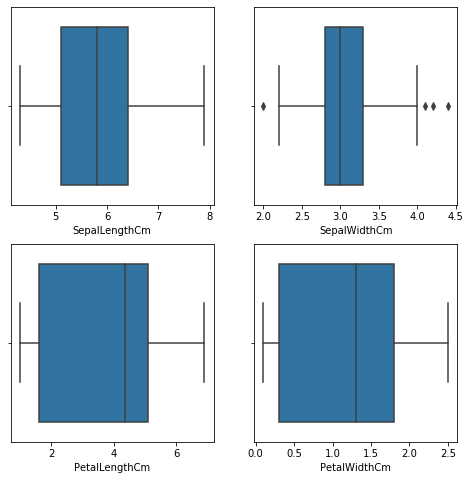

In [14]:
plt.figure(figsize = (8,8))
feature = df.columns[:4]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(df[i[1]])

- We observe outliers in SepalWidthCm and therefore,we will cap it with 99:1 ratiio

### Outlier Treatment

In [15]:
# capping

q1 = df['SepalWidthCm'].quantile(0.01)
q4 = df['SepalWidthCm'].quantile(0.99)

df['SepalWidthCm'][df['SepalWidthCm']<= q1] = q1
df['SepalWidthCm'][df['SepalWidthCm']>= q4] = q4

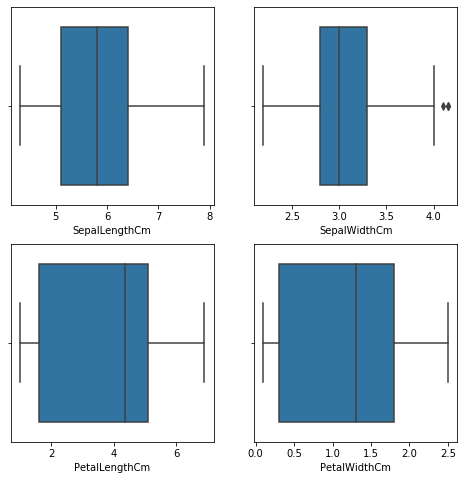

In [16]:
plt.figure(figsize = (8,8))
feature = df.columns[:4]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(df[i[1]])

In [17]:
# Species is dropped as it's an string and will create problem while using it with int and float values

df.drop('Species', axis =1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


### Clustering

In [18]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
hopkins(df.drop('ID', axis = 1))

0.8537763986641136

### Rescaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(df.drop('ID', axis = 1))

In [22]:
scaled_df1 = pd.DataFrame(scaled_df1, columns = df.columns[:-1])
scaled_df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


In [23]:
scaled_df1.shape

(150, 4)

### K-Means Clustering

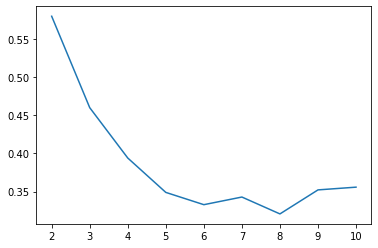

In [24]:
# Choosing the value of K
# Silhouette score

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(scaled_df1)
    ss.append([k, silhouette_score(scaled_df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

In [25]:
Range_clusters=[2,3,4,5,6,7,8,9,10]                                      # selecting range of clusters
for i in Range_clusters:                                                # For loop
    kmeans = KMeans(n_clusters=i,max_iter=100)                            # Using iteration 100 for finding Kmeans
    kmeans.fit(scaled_df1)                                             # fitting the kmeans
    cluster_label=kmeans.labels_                                        # saving the labels in a cluster_label list
    
    silhouette_Score=silhouette_score(scaled_df1,cluster_label)        # finding the silhouette score 
    
    # Printing for all number of clusters of range(2,10) for silhouette score
    
    print("For no. of cluster={0},silhouette score is {1}".format(i,silhouette_Score))    

For no. of cluster=2,silhouette score is 0.5799043037099341
For no. of cluster=3,silhouette score is 0.4600387728518416
For no. of cluster=4,silhouette score is 0.4001338939916564
For no. of cluster=5,silhouette score is 0.3476777430721242
For no. of cluster=6,silhouette score is 0.33582531788919195
For no. of cluster=7,silhouette score is 0.3407901894591991
For no. of cluster=8,silhouette score is 0.3370136959909278
For no. of cluster=9,silhouette score is 0.33588871176667007
For no. of cluster=10,silhouette score is 0.361168487025981


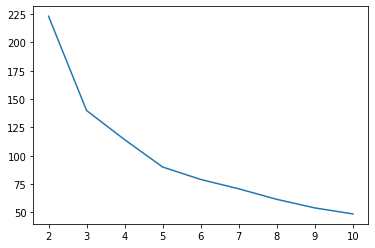

In [26]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(scaled_df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

- We observe 3 clusters

In [27]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(scaled_df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [28]:
# Copying original dataset into a new variable

df_kmean = df.copy()

In [29]:
# New dataset cluster labels
kmean.labels_  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [30]:
# From Array to series
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,0
1,0
2,0
3,0
4,0


In [31]:
#concating

df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID,label
0,5.1,3.5,1.4,0.2,100,0
1,4.9,3.0,1.4,0.2,101,0
2,4.7,3.2,1.3,0.2,102,0
3,4.6,3.1,1.5,0.2,103,0
4,5.0,3.6,1.4,0.2,104,0


In [32]:
df_kmean.label.value_counts()

2    53
0    50
1    47
Name: label, dtype: int64

### Cluster Profiling

In [33]:
df_kmean= df_kmean.drop('ID', axis = 1)
df_kmean.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


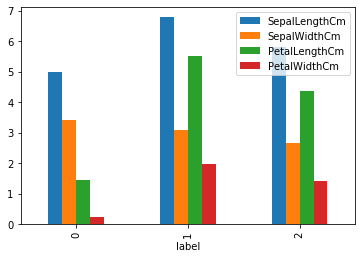

In [34]:
# Making sense out of the clusters
df_kmean.groupby('label').mean().plot(kind = 'bar')

- SepalLengthCm dominates in all 3 clusters 
- PetalWidthCm is the least in all 3cluster

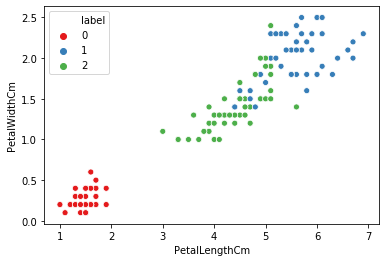

In [35]:
# Plot the cluster
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'label', data = df_kmean, palette = 'Set1')

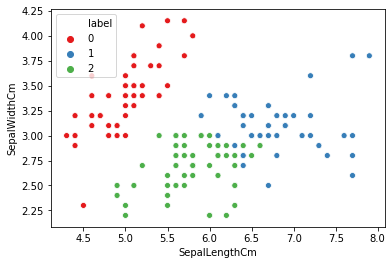

In [36]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'label', data = df_kmean, palette = 'Set1')

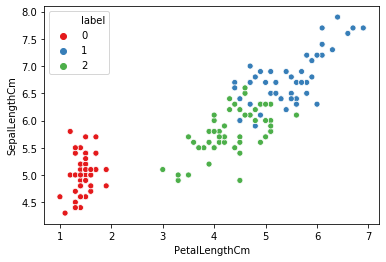

In [37]:
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalLengthCm', hue = 'label', data = df_kmean, palette = 'Set1')

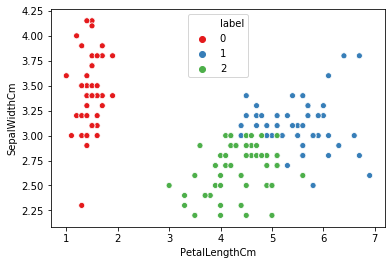

In [38]:
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalWidthCm', hue = 'label', data = df_kmean, palette = 'Set1')

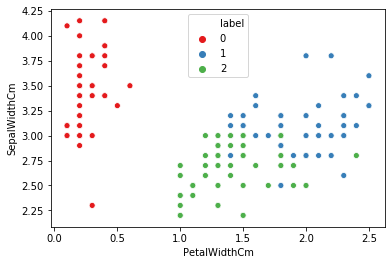

In [39]:
sns.scatterplot(x = 'PetalWidthCm', y = 'SepalWidthCm', hue = 'label', data = df_kmean, palette = 'Set1')

- After plotting scatterplots, we observe that Cluster 1 has highest range and Cluster 2 has minimum

### Clustering Profiling

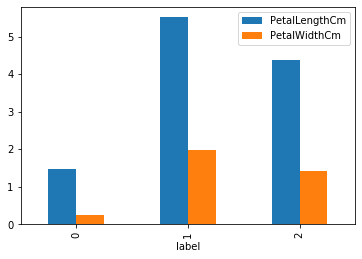

In [41]:
df_kmean.drop(['SepalLengthCm', 'SepalWidthCm'], axis = 1).groupby('label').mean().plot(kind = 'bar')

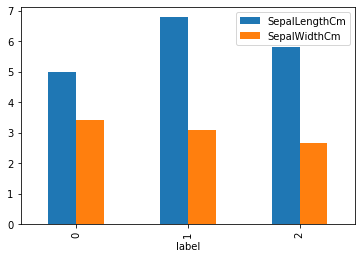

In [42]:
df_kmean.drop(['PetalLengthCm', 'PetalWidthCm'], axis = 1).groupby('label').mean().plot(kind = 'bar')

#### Conclusion from K-Means Clustering

- SepalLengthCm and PetalLengthCm are the influencing factors, as we can see from the above data

### Hierarchical Clustering

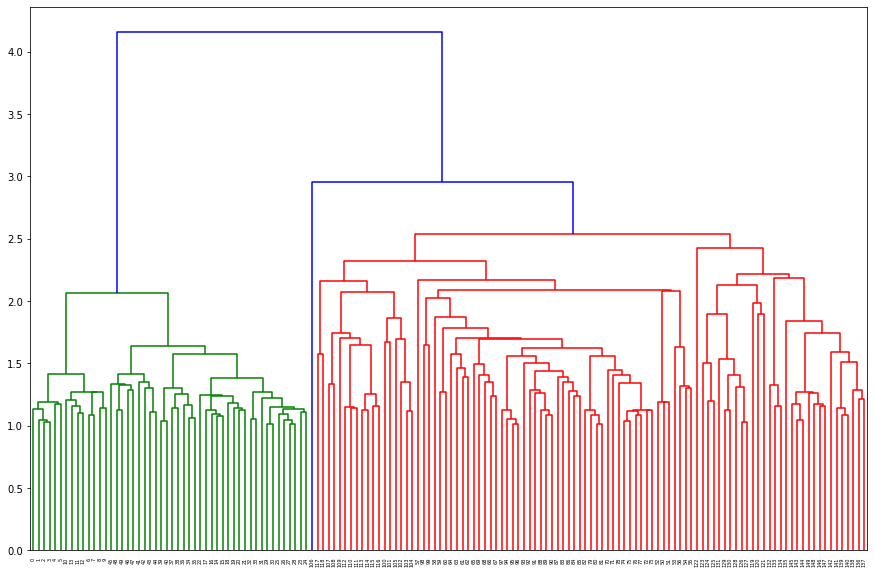

In [43]:
# Heirarchical Clustering for Single method
df_clustering = df
fig = plt.figure(figsize = (15,10))
mergings = linkage(df_clustering, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

- Single method Heirarchical Clustering shows 3 clusters

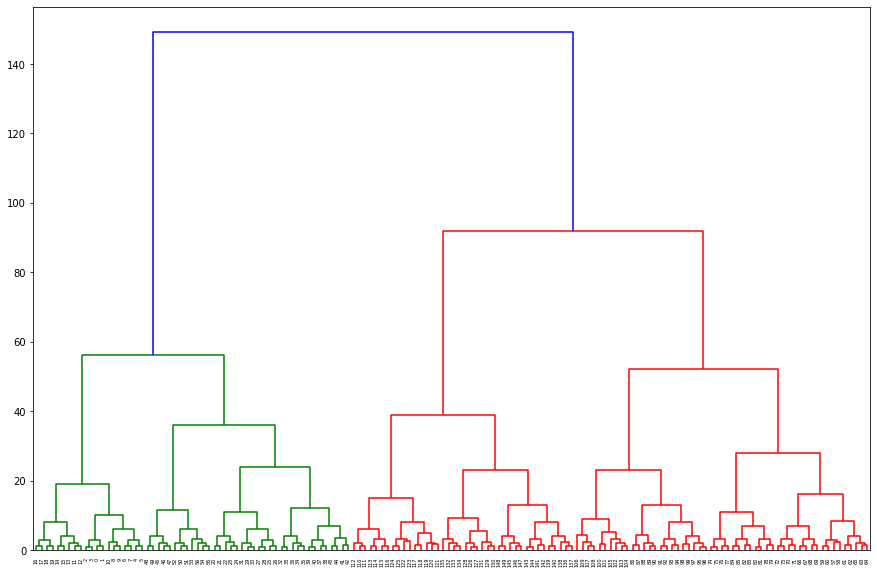

In [44]:
# Heirarchical Clustering for Complete method
fig = plt.figure(figsize = (15,10))
mergings = linkage(df_clustering, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

- Using cut_tree we will get 3 clusters

In [45]:
#showing full range of array
clstr_cut = cut_tree(mergings, n_clusters = 3).reshape(-1,)
clstr_cut

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
#from array to Series
clstr_cut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
clstr_cut.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [47]:
#Total value counts in each cluster
clstr_cut.value_counts()

0    57
1    53
2    40
dtype: int64

#### Conclusion
- We Observe three cluster on using Heirarchical Clustering which is same as K-Means Clustering